## Cleaning data in Pandas.

**Initial steps:**

1. Import required libraries.

2. Get and display the data.

3. Remove duplicated rows.

4. Add and/or remove columns.

5. Rename the column.

6. Handle missing data.

7. Replace values.

8. Data formatting.

9. Data Standardization.

10. Data Normalization.

11. Binning.

12. Indicator variable (dummy variable).

13. Sort data.

14. Save clean data.

### 1. Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Get and display the data.

In [2]:
# OPTION 1
# Create data: names and birth rates
make = ['VW','BMW','Mercedes Benz','Porche']
hp = [155, 180, 175, 190]

# Merge two lists together.
DataSet = list(zip(make, hp))
DataSet

[('VW', 155), ('BMW', 180), ('Mercedes Benz', 175), ('Porche', 190)]

In [3]:
# Create DataFrame and set column titles
df0 = pd.DataFrame(DataSet)
headers = ['Make','Horsepower']
df0.columns = headers
df0

,Make,Horsepower
0,VW,155
1,BMW,180
2,Mercedes Benz,175
3,Porche,190


In [4]:
# OPTION 2
# Import data from csv to a Pandas DataFrame
headers = ["symboling","normalized losses","make","Fuel type","Aspiration", "Num of doors","Body style",
         "Drive Wheels","Engine Location","Wheel Base", "Length","Width","Height","Curb weight","Engine type",
         "Num of cylinders", "Engine size","Fuel system","Bore","Stroke","Compression ratio","Horsepower",
         "Peak rpm","City mpg","Highway mpg","Price"]

df = pd.read_csv('Data/Cars.csv', names = headers)

#### Read/Save Other Data Formats



| Data Formate  | Read           | Save             |
| ------------- |:--------------:| ----------------:|
| csv           | `pd.read_csv()`  |`df.to_csv()`     |
| json          | `pd.read_json()` |`df.to_json()`    |
| excel         | `pd.read_excel()`|`df.to_excel()`   |
| hdf           | `pd.read_hdf()`  |`df.to_hdf()`     |
| sql           | `pd.read_sql()`  |`df.to_sql()`     |
| ...           |   ...          |       ...        |

In [5]:
# Show the first 5 rows
df.head(5)

,symboling,normalized losses,make,Fuel type,Aspiration,Num of doors,Body style,Drive Wheels,Engine Location,Wheel Base,...,Engine size,Fuel system,Bore,Stroke,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Show the last 5 rows
df.tail(5)

,symboling,normalized losses,make,Fuel type,Aspiration,Num of doors,Body style,Drive Wheels,Engine Location,Wheel Base,...,Engine size,Fuel system,Bore,Stroke,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### 3. Remove duplicated rows.

In [7]:
duplicated_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicated_rows_df.shape)
df = df.drop_duplicates()

# Reset index, because we droped rows
df.reset_index(drop=True, inplace=True)

Number of duplicate rows:  (0, 26)


### 4. Add, remove, select columns.

In [8]:
# Insert a column in position 1
df.insert(1, 'Test', df['make'])
df.head()

,symboling,Test,normalized losses,make,Fuel type,Aspiration,Num of doors,Body style,Drive Wheels,Engine Location,...,Engine size,Fuel system,Bore,Stroke,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,3,alfa-romero,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# Delete a column
del df['Test']
df.head()

,symboling,normalized losses,make,Fuel type,Aspiration,Num of doors,Body style,Drive Wheels,Engine Location,Wheel Base,...,Engine size,Fuel system,Bore,Stroke,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
# Drop unused columns.
drop_columns = ["symboling","normalized losses","Aspiration",
         "Drive Wheels","Engine Location","Curb weight","Engine type","Bore","Stroke","Fuel system",'Length','Width','Height','Wheel Base']

df.drop(drop_columns, inplace = True, axis = 1)
df.head()

,make,Fuel type,Num of doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,six,152,9.0,154,5000,19,26,16500
3,audi,gas,four,sedan,four,109,10.0,102,5500,24,30,13950
4,audi,gas,four,sedan,five,136,8.0,115,5500,18,22,17450


In [11]:
# Select certain column or a group of columns from the DataFrame and generate a new df.
df3 = df[['make','Horsepower','Price']]
df3.head()

,make,Horsepower,Price
0,alfa-romero,111,13495
1,alfa-romero,111,16500
2,alfa-romero,154,16500
3,audi,102,13950
4,audi,115,17450


### 5. Rename the columns.

In [12]:
# Rename columns
newcols = {'make' : 'Make',
           'Num of doors' : 'Doors'}

df.rename(columns=newcols, inplace=True)
df.head()

,Make,Fuel type,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,six,152,9.0,154,5000,19,26,16500
3,audi,gas,four,sedan,four,109,10.0,102,5500,24,30,13950
4,audi,gas,four,sedan,five,136,8.0,115,5500,18,22,17450


### 6. Handle missing data.

In [13]:
# Replace values in all DataFrame
# As missing data is represented by ? in this df, it is replaced by nan
df.replace("?", np.nan, inplace = True)

In [14]:
# isnull() returns True where the field is NaN.
# Makes a summary for each column and counts how many null fields are in the DataFrame.
print('Null fields in each column:\n')
print(df.isnull().sum())

Null fields in each column:

Make                 0
Fuel type            0
Doors                2
Body style           0
Num of cylinders     0
Engine size          0
Compression ratio    0
Horsepower           2
Peak rpm             2
City mpg             0
Highway mpg          0
Price                4
dtype: int64


In [15]:
# Other way is to...
missing_data = df.isnull()
# Makes a summary for each column and counts how many 'False' (data OK) and 'True' (data missing) are.
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Make
False    205
Name: Make, dtype: int64

Fuel type
False    205
Name: Fuel type, dtype: int64

Doors
False    203
True       2
Name: Doors, dtype: int64

Body style
False    205
Name: Body style, dtype: int64

Num of cylinders
False    205
Name: Num of cylinders, dtype: int64

Engine size
False    205
Name: Engine size, dtype: int64

Compression ratio
False    205
Name: Compression ratio, dtype: int64

Horsepower
False    203
True       2
Name: Horsepower, dtype: int64

Peak rpm
False    203
True       2
Name: Peak rpm, dtype: int64

City mpg
False    205
Name: City mpg, dtype: int64

Highway mpg
False    205
Name: Highway mpg, dtype: int64

Price
False    201
True       4
Name: Price, dtype: int64



#### How to deal with missing data?
1. Drop data:
  * Drop row.
  * Drop column. This should be done only if most entries in the column are empty.
2. Replace data by:
  * Mean.
  * Frequency.
  * Other functions.

#### Replace by mean:

    "Horsepower": 2 missing data, replace them with mean

    "Peak-rpm": 2 missing data, replace them with mean

**Reason:** Both columns are numerical values and can be replaced by the mean.

Average of horsepower: 104.25615763546799


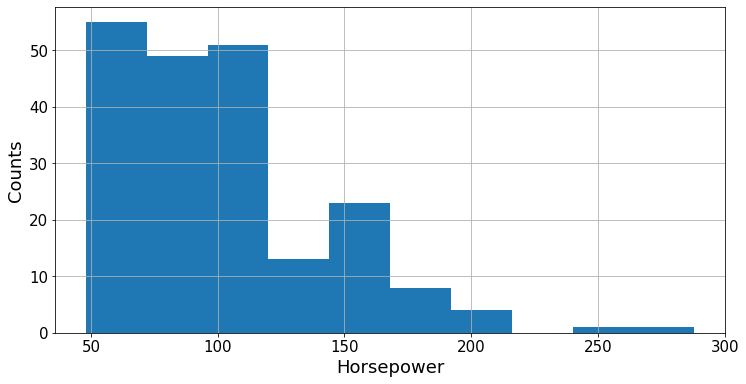

In [16]:
# Calculate column mean
avg_horsepower = df["Horsepower"].astype("float").mean(axis=0)
print("Average of horsepower:", avg_horsepower)

# Replace NaN by column mean
df["Horsepower"].replace(np.nan, avg_horsepower, inplace=True)

# Plot a histogram to check if it makes sense to replace by mean
df["Horsepower"] = df["Horsepower"].astype(int, copy=True)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['Horsepower'])
ax.set_xlabel(r"Horsepower", fontsize=18)
ax.set_ylabel(r"Counts", fontsize=18)
ax.tick_params(labelsize=15)
ax.axis('tight')
ax.grid(True)

Average of peak rpm: 5125.369458128079


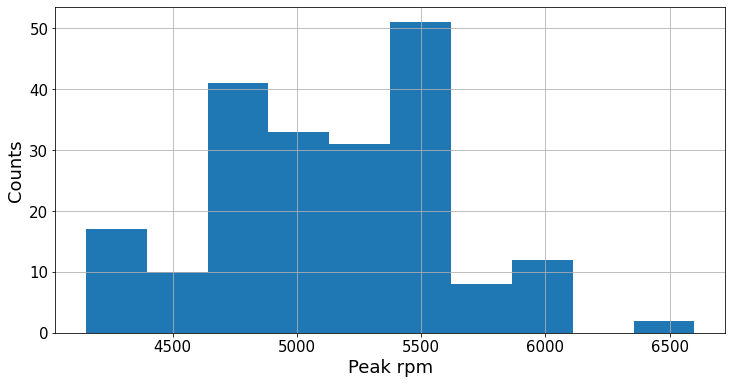

In [17]:
# Calculate column mean
avg_peak_rpm = df["Peak rpm"].astype("float").mean(axis=0)
print("Average of peak rpm:", avg_peak_rpm)

# Replace NaN by column mean
df["Peak rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

# Plot a histogram to check if it makes sense to replace by mean
df["Peak rpm"] = df["Peak rpm"].astype(int, copy=True)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df["Peak rpm"])
ax.set_xlabel(r"Peak rpm", fontsize=18)
ax.set_ylabel(r"Counts", fontsize=18)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

#### Replace by frequency:

    "Doors": 2 missing data

**Reason:** In this case the average does not make sense, because the car has either 2 or 4 doors. Since four doors is most frequent, it is most likely to occur.

In [18]:
df['Doors'].value_counts()

four    114
two      89
Name: Doors, dtype: int64

In [19]:
#replace the missing 'num-of-doors' values by the most frequent 
most_frecuent = df['Doors'].value_counts().idxmax()
df["Doors"].replace(np.nan, most_frecuent, inplace=True)

#### Drop the whole row:

    "price": 4 missing data, simply delete the whole row

**Reason:** If price is what we want to predict, any data entry without price data cannot be used for prediction.

In [20]:
# Drop rows without cars price
df.dropna(subset=["Price"], axis=0, inplace=True)

In [21]:
# Cheack null values
print('Null fields in each column:\n')
print(df.isnull().sum())

Null fields in each column:

Make                 0
Fuel type            0
Doors                0
Body style           0
Num of cylinders     0
Engine size          0
Compression ratio    0
Horsepower           0
Peak rpm             0
City mpg             0
Highway mpg          0
Price                0
dtype: int64


In [22]:
# Reset index, because we droped rows
df.reset_index(drop=True, inplace=True)

### 7. Replace values.

In [23]:
# Replace the values in a column
replace_values = {'two': 2, 'four': 4}
df.replace({"Doors": replace_values}, inplace = True)

In [24]:
# Convert audi to audi
mask = df.Make == 'audi'
df['Make'][mask] = 'Audi'
df.head()

/Users/ABF/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Make,Fuel type,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,alfa-romero,gas,2,convertible,four,130,9.0,111,5000,21,27,13495
1,alfa-romero,gas,2,convertible,four,130,9.0,111,5000,21,27,16500
2,alfa-romero,gas,2,hatchback,six,152,9.0,154,5000,19,26,16500
3,Audi,gas,4,sedan,four,109,10.0,102,5500,24,30,13950
4,Audi,gas,4,sedan,five,136,8.0,115,5500,18,22,17450


In [25]:
# Modify data with a function
df['Make'] = df.Make.apply(lambda x: x.upper())
df.head()

,Make,Fuel type,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,ALFA-ROMERO,gas,2,convertible,four,130,9.0,111,5000,21,27,13495
1,ALFA-ROMERO,gas,2,convertible,four,130,9.0,111,5000,21,27,16500
2,ALFA-ROMERO,gas,2,hatchback,six,152,9.0,154,5000,19,26,16500
3,AUDI,gas,4,sedan,four,109,10.0,102,5500,24,30,13950
4,AUDI,gas,4,sedan,five,136,8.0,115,5500,18,22,17450


### 8. Data formatting.

In [26]:
df.dtypes

Make                  object
Fuel type             object
Doors                  int64
Body style            object
Num of cylinders      object
Engine size            int64
Compression ratio    float64
Horsepower             int64
Peak rpm               int64
City mpg               int64
Highway mpg            int64
Price                 object
dtype: object

In [27]:
# Convert data types to proper format
df[["Doors"]] = df[["Doors"]].astype("int")
df[["Horsepower"]] = df[["Horsepower"]].astype("int")
df[["Peak rpm"]] = df[["Peak rpm"]].astype("int")
df[["Price"]] = df[["Price"]].astype("float")

In [28]:
df.dtypes

Make                  object
Fuel type             object
Doors                  int64
Body style            object
Num of cylinders      object
Engine size            int64
Compression ratio    float64
Horsepower             int64
Peak rpm               int64
City mpg               int64
Highway mpg            int64
Price                float64
dtype: object

### 9. Data Standardization.

This is the process of transforming data into a common format which allows the researcher to make the meaningful comparison. As data is usually collected from different agencies with different formats, we should standarize the data. Ex: data units convertion.

### 10.Data Normalization.

This is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the varriable so:
  * The average is 0.
  * The variance is 1.
  * The variable range from 0 to 1.

In [29]:
# Example: replace (original value) by (original value)/(maximum value)
max_engine_size = df['Engine size'].max()
df['Engine size'] = df['Engine size']/max_engine_size
df.head()

,Make,Fuel type,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,ALFA-ROMERO,gas,2,convertible,four,0.398773,9.0,111,5000,21,27,13495.0
1,ALFA-ROMERO,gas,2,convertible,four,0.398773,9.0,111,5000,21,27,16500.0
2,ALFA-ROMERO,gas,2,hatchback,six,0.466258,9.0,154,5000,19,26,16500.0
3,AUDI,gas,4,sedan,four,0.334356,10.0,102,5500,24,30,13950.0
4,AUDI,gas,4,sedan,five,0.417178,8.0,115,5500,18,22,17450.0


### 11. Binning.

This is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis. For example, if we only care about the price difference between cars with high, medium, and little horsepower we can we rearrange them into three ‘bins' to simplify analysis.

In [30]:
# Create 3 bins of equal size bandwidth.
group_names = ['Low', 'Medium', 'High']
bins = np.linspace(min(df["Horsepower"]), max(df["Horsepower"]), len(group_names)+1)
df['Horsepower binned'] = pd.cut(df['Horsepower'], bins, labels=group_names, include_lowest=True )
df[['Horsepower','Horsepower binned']].head()

,Horsepower,Horsepower binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [31]:
df["Horsepower binned"].value_counts()

Low       153
Medium     43
High        5
Name: Horsepower binned, dtype: int64

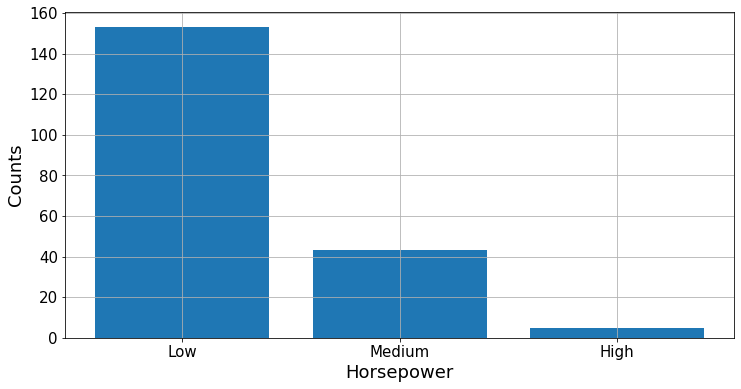

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(group_names, df["Horsepower binned"].value_counts())
ax.set_xlabel(r"Horsepower", fontsize=18)
ax.set_ylabel(r"Counts", fontsize=18)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

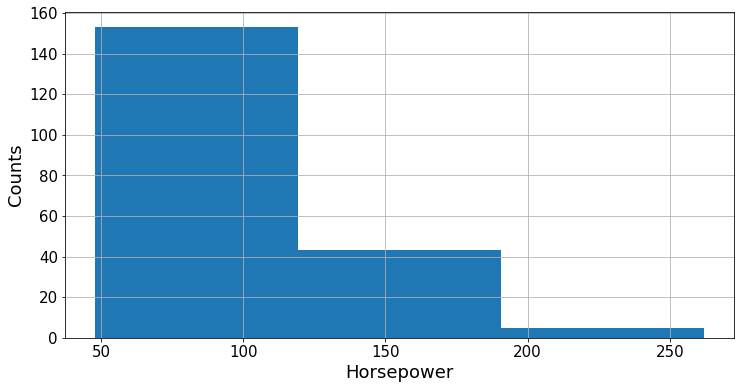

In [33]:
# draw historgram of attribute "horsepower" with bins = 3
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df["Horsepower"], bins = 3)
ax.set_xlabel(r"Horsepower", fontsize=18)
ax.set_ylabel(r"Counts", fontsize=18)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

### 12. Indicator variable (dummy variable).

This is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. This is done in order to use categorical variables for regression analysis in the later analysis.

For example, "Fuel type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "Fuel type" into indicator variables.

In [34]:
dummy_variable_1 = pd.get_dummies(df["Fuel type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [35]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Fuel type", axis = 1, inplace=True)
df.head()

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,diesel,gas
0,ALFA-ROMERO,2,convertible,four,0.398773,9.0,111,5000,21,27,13495.0,Low,0,1
1,ALFA-ROMERO,2,convertible,four,0.398773,9.0,111,5000,21,27,16500.0,Low,0,1
2,ALFA-ROMERO,2,hatchback,six,0.466258,9.0,154,5000,19,26,16500.0,Medium,0,1
3,AUDI,4,sedan,four,0.334356,10.0,102,5500,24,30,13950.0,Low,0,1
4,AUDI,4,sedan,five,0.417178,8.0,115,5500,18,22,17450.0,Low,0,1


In [36]:
# Rename columns
newcols = {'diesel' : 'Diesel',
           'gas' : 'Gas'}

df.rename(columns=newcols, inplace=True)
df.head()

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,Diesel,Gas
0,ALFA-ROMERO,2,convertible,four,0.398773,9.0,111,5000,21,27,13495.0,Low,0,1
1,ALFA-ROMERO,2,convertible,four,0.398773,9.0,111,5000,21,27,16500.0,Low,0,1
2,ALFA-ROMERO,2,hatchback,six,0.466258,9.0,154,5000,19,26,16500.0,Medium,0,1
3,AUDI,4,sedan,four,0.334356,10.0,102,5500,24,30,13950.0,Low,0,1
4,AUDI,4,sedan,five,0.417178,8.0,115,5500,18,22,17450.0,Low,0,1


In [37]:
# The method fillna(arg) replaces the NaN in the DataFrame with arg.
#df.fillna(0)

### 13. Sort data.

In [38]:
df.sort_values(by=['Price'], inplace=True)
# Reset index
df.reset_index(drop=True, inplace=True)
df.head()

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,Diesel,Gas
0,SUBARU,2,hatchback,four,0.297546,9.0,69,4900,31,36,5118.0,Low,0,1
1,CHEVROLET,2,hatchback,three,0.187117,9.5,48,5100,47,53,5151.0,Low,0,1
2,MAZDA,2,hatchback,four,0.279141,9.0,68,5000,30,31,5195.0,Low,0,1
3,TOYOTA,2,hatchback,four,0.282209,9.0,62,4800,35,39,5348.0,Low,0,1
4,MITSUBISHI,2,hatchback,four,0.282209,9.4,68,5500,37,41,5389.0,Low,0,1


### 14. Save clean data.

In [39]:
# Save data to file
df.to_csv("Data/Cars_CleanData.csv", index=False)

<h3>Read/Save Other Data Formats</h3>



| Data Formate  | Read           | Save             |
| ------------- |:--------------:| ----------------:|
| csv           | `pd.read_csv()`  |`df.to_csv()`     |
| json          | `pd.read_json()` |`df.to_json()`    |
| excel         | `pd.read_excel()`|`df.to_excel()`   |
| hdf           | `pd.read_hdf()`  |`df.to_hdf()`     |
| sql           | `pd.read_sql()`  |`df.to_sql()`     |
| ...           |   ...          |       ...        |